In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/My Data files/netflix_data.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [14]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [12]:
netflix['release_year'] = netflix['release_year'].astype('int')

In [16]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
duration,0
description,0


In [17]:
netflix.shape

(7787, 11)

In [23]:
netflix['country'].value_counts().groupby('country').size()

,count
country,
Argentina,1
Australia,1
Austria,1
Bangladesh,1
Belarus,1
...,...
Uruguay,1
Venezuela,1
Vietnam,1


In [24]:
netflix_countries = netflix['country'].value_counts()

,count
country,
United States,2883
India,956
United Kingdom,577
Canada,259
Japan,237
...,...
Zimbabwe,1
Namibia,1
Soviet Union,1


In [27]:
nc_val = netflix['country'].value_counts().values
nc_val

array([2883,  956,  577,  259,  237,  196,  194,  168,  123,  108,  106,
        105,   92,   86,   82,   79,   77,   76,   75,   71,   68,   61,
         59,   36,   35,   30,   28,   26,   26,   25,   23,   22,   21,
         20,   20,   20,   19,   19,   16,   15,   14,   10,   10,    9,
          8,    7,    6,    6,    6,    5,    5,    5,    5,    4,    4,
          3,    3,    2,    2,    2,    2,    2,    2,    2,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [26]:
nc_names = netflix['country'].value_counts().index

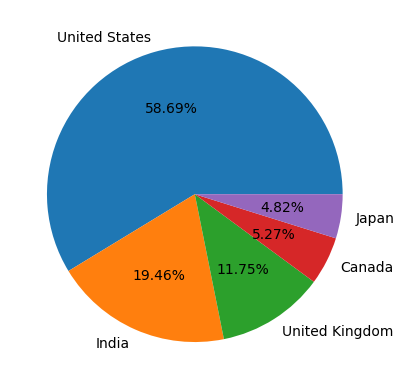

In [31]:
plt.pie(nc_val[:5], labels=nc_names[:5], autopct='%.2f%%')
plt.show()

In [33]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
duration,0
description,0


In [35]:
netflix['genre'].value_counts()

,count
genre,
Dramas,1384
Comedies,1074
Documentaries,751
Action,721
International TV,690
Children,502
Crime TV,369
Kids,359
Stand-Up,354


In [41]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [47]:
movies_2000s = netflix[(netflix['genre'] == 'Action') & (netflix['release_year'] >= 2000) & (netflix['country'] >= 'United States')]
movies_2000s.shape

(211, 11)

In [48]:
movies_2000s.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,93,"Aiming to hasten an uprising, the leader of an...",Action
50,s51,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...",United States,"June 1, 2019",2008,109,Fierce mammoth hunter D'Leh sets out on an imp...,Action
71,s72,Movie,16 Blocks,Richard Donner,"Bruce Willis, Mos Def, David Morse, Jenna Ster...",United States,"November 1, 2019",2006,102,Tasked with escorting a prosecution witness to...,Action
88,s89,Movie,2307: Winter's Dream,Joey Curtis,"Paul Sidhu, Arielle Holmes, Branden Coles, Kel...",United States,"March 1, 2018",2016,101,In the frozen tundra of a futuristic Arizona w...,Action
96,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...",United States,"December 1, 2020",2014,117,A terminally ill secret agent accepts a risky ...,Action
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,"January 1, 2021",2011,83,Two crooks planning a bank heist wind up abduc...,Action
127,s128,Movie,6 Underground,Michael Bay,"Ryan Reynolds, Mélanie Laurent, Corey Hawkins,...",United States,"December 13, 2019",2019,129,"After faking his death, a tech billionaire rec...",Action
262,s263,Movie,A.X.L.,Oliver Daly,"Alex Neustaedter, Becky G., Alex MacNicoll, Do...",United States,"March 20, 2019",2018,99,Young motocross racer Miles Hill helps a top-s...,Action
298,s299,Movie,Act of Valor,"Mike McCoy, Scott Waugh","Keo Woolford, Drea Castro, Emilio Rivera, Rork...",United States,"June 1, 2020",2012,110,An elite squad of Navy SEALs is tasked with re...,Action
